In [1]:
#importing libraries
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(url)

In [3]:
#Working on Dataset
df = df.loc[:,['data','totale_casi']]

In [4]:
FMT = '%Y-%m-%dT%H:%M:%S'
date = df['data']

In [5]:
df['data'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-24T18:00:00", FMT)).days  )
print(df)

     data  totale_casi
0       0          229
1       1          322
2       2          400
3       3          650
4       4          888
5       5         1128
6       6         1694
7       7         2036
8       8         2502
9       9         3089
10     10         3858
11     11         4636
12     12         5883
13     13         7375
14     14         9172
15     15        10149
16     15        12462
17     16        15113
18     17        17660
19     18        21157
20     19        24747
21     20        27980
22     21        31506
23     22        35713
24     23        41035
25     24        47021
26     25        53578
27     26        59138
28     27        63927
29     28        69176
..    ...          ...
191   190       271515
192   191       272912
193   192       274644
194   193       276337
195   194       277634
196   195       278784
197   196       280153
198   197       281583
199   198       283180
200   199       284796
201   200       286297
202   201  

In [7]:
#Scaling The Data
from sklearn import preprocessing
a = df.iloc[:, 1:2].values 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(a)

In [8]:
df['totale_casi'] = x_after_min_max_scaler
print(df)

     data  totale_casi
0       0     0.000000
1       1     0.000293
2       2     0.000539
3       3     0.001327
4       4     0.002078
5       5     0.002834
6       6     0.004619
7       7     0.005697
8       8     0.007166
9       9     0.009017
10     10     0.011441
11     11     0.013894
12     12     0.017826
13     13     0.022530
14     14     0.028195
15     15     0.031276
16     15     0.038568
17     16     0.046926
18     17     0.054956
19     18     0.065981
20     19     0.077300
21     20     0.087493
22     21     0.098610
23     22     0.111873
24     23     0.128653
25     24     0.147525
26     25     0.168198
27     26     0.185727
28     27     0.200826
29     28     0.217375
..    ...          ...
191   190     0.855306
192   191     0.859711
193   192     0.865171
194   193     0.870509
195   194     0.874598
196   195     0.878224
197   196     0.882540
198   197     0.887048
199   198     0.892083
200   199     0.897178
201   200     0.901911
202   201  

In [9]:
#Defining Logarithmic Model
def L(a,x,y,z):
    return (z/(1+np.exp(-(a-y)/x)))

In [10]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219]
[0.0,

In [19]:
#Calculating Values for plotting the curve
covariance, fit = curve_fit(L,x,y,p0=[2,100,20000])
print(fit)
print('covariances diagonal elements')
print('x = ', fit[0])
print('y = ', fit[1])
print('z = ', fit[2])
print(covariance)

[[4.50479473e-01 6.49557289e-02 1.29662978e-03]
 [6.49557289e-02 5.66427687e-01 1.58206523e-03]
 [1.29662978e-03 1.58206523e-03 2.89549248e-05]]
covariances diagonal elements
x =  [0.45047947 0.06495573 0.00129663]
y =  [0.06495573 0.56642769 0.00158207]
z =  [1.29662978e-03 1.58206523e-03 2.89549248e-05]
[14.86859621 43.45234983  0.80771025]


In [20]:
errors = [np.sqrt(fit[i][i]) for i in [0,1,2]]
print(errors)
print('[     +/- x,                +/- y,             +/- z       ]')

[0.6711776761465219, 0.7526139026756076, 0.00538097805468885]
[     +/- x,                +/- y,             +/- z       ]


In [21]:
x1 = covariance[0]
y1 = covariance[1]
z1 = covariance[2]
a1 = list(df.iloc[:,0])
infection_end = int(fsolve(lambda a1 : L(a1,x1,y1,z1) - int(z1),y1, maxfev = 5000))

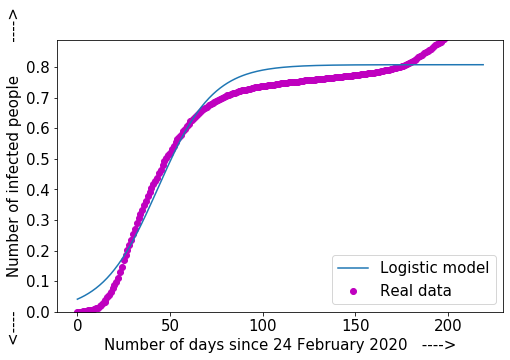

In [22]:
#Plotting curve for logarithmic model and actual numbers
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])
x_param = list(range(max(x),infection_end))
plt.rcParams['figure.figsize'] = [8, 5]
plt.rc('font', size= 15)
plt.scatter(x,y,label = "Real data",color = "m")
# Predicted logistic curve
plt.plot(x+x_param, [L(i,covariance[0],covariance[1],covariance[2]) for i in x+x_param], label="Logistic model" )
plt.legend()
plt.xlabel("Number of days since 24 February 2020   ---->")
plt.ylabel("<----       Number of infected people       ---->")
plt.ylim((min(y)*0.9,z1*1.1))
plt.show()

In [23]:
#calculating mean-squared error
y_predicted = [L(i,covariance[0],covariance[1],covariance[2]) for i in x+x_param]
mean_squared_error(y, y_predicted)

0.00345462686431611

In [24]:
#Defining Exponential Model
def f(a,x,y,z):
    return x*np.exp(y*(a-z))

In [25]:
#Caluclating values for plotting the curve
exp_fit = curve_fit(f,x,y, p0 = [100, 1, 20], maxfev=5000)
print(exp_fit)
print('covariances diagonal elements')
print('x = ', exp_fit[0][0])
print('y = ', exp_fit[0][1])
print('z = ', exp_fit[0][2])

(array([5.17097602e-01, 5.08980618e-03, 7.65673300e+01]), array([[5.30990630e+11, 7.77152554e+01, 2.01749788e+14],
       [7.77152589e+01, 8.53462604e-08, 2.95278987e+04],
       [2.01749788e+14, 2.95278980e+04, 7.66547929e+16]]))
covariances diagonal elements
x =  0.517097602181557
y =  0.005089806184643119
z =  76.56732997684489


In [27]:
errors = [np.sqrt(fit[i][i]) for i in [0,1,2]]
print(errors)
print('[     +/- x,                +/- y,             +/- z       ]')

[0.6711776761465219, 0.7526139026756076, 0.00538097805468885]
[     +/- x,                +/- y,             +/- z       ]


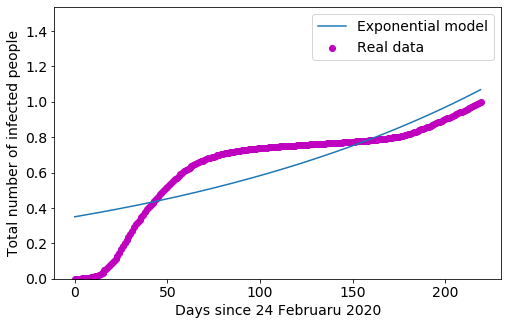

In [28]:
#Plotting curve for logarithmic model and actual numbers
x_param = list(range(max(x),infection_end))
plt.rcParams['figure.figsize'] = [8, 5]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Real data",color="m")

# Predicted exponential curve
plt.plot(x+x_param, [f(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+x_param], label="Exponential model" )
plt.legend()
plt.xlabel("Days since 24 Februaru 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,z1*1.9))
plt.show()

In [30]:
#Calculating mean-squared error
y_predicted =  [f(i,exp_fit[0][0], exp_fit[0][1], exp_fit[0][2]) for i in x]
mean_squared_error(y,y_predicted)

0.023608610093890075